# overview
feature engineeing includes <font color=burgendy><b>feature seletion</b></font> and <font color=burgendy><b>feature extraction</b></font>
## feature selection
1. could be divided into filter, wrapper, embedded and hybrid
2. filter is more easy to accomplish


    > feature selection more focuses on finding multicollinearity between features or correlations between dependent and independent variables.
    > most basic and intuitive method could be droping features that are not relative at the first glance and features with many missing values

# MI and IG
1. Mutual Information and Information Gain are the same concept, the only difference is that MI will determine whether two random variables would be independent to each other, while IG will calculate the value when one feature is taken into consideration, how much information it would contribute to total change of dependent variable.

note that MI and IG shares the same formula, which is:
$$
\left\{
\begin{array}{ll}
    I(X;Y) & = & H(X) - H(X|Y) = H(Y) - H(Y|X) \\
    H(X|Y) & = & -\sum_{y \in Y} {p(y)H(X|Y=y)} \\
    & = & -\sum_{y \in Y}{p(y)}\sum_{x \in X}{p(x|y)log{p(x|y)}} \\
    & = & -\sum_{y \in Y}{\sum_{x \in X}{p(x,y)log\frac{p(x,y)}{p(y)}}} \\
    I(X;Y) & = & -\sum_{x \in X}{p(x)logp(x)} + \sum_{y \in Y}{\sum_{x \in X}{p(x,y)log\frac{p(x,y)}{p(y)}}}\\
    & = & -\sum_{x \in X}{\sum_{y \in Y}{p(x,y)logp(x)}} + \sum_{y \in Y}{\sum_{x \in X}{p(x,y)log\frac{p(x,y)}{p(y)}}} \\
    & = & \sum_{y \in Y}{\sum_{x \in X}{p(x,y)log\frac{p(x,y)}{p(x)p(y)}}}
\end{array}
\right .
$$

## ID3 implementation
Adding new feature for classification will add more information to exsiting system, which will be viewed as conditional probability entropy. <br>
The formula evolution should be viewed like IG:
$$
\begin{array}{ll}
    IG(D,a) & = & H(D) - H(D|a) \\
    & = & Ent(D) - \sum{\frac{|D_v|}{|D|}Ent(D^v)} \\
\end{array}
$$
* here D means dataset <br>
* a is one classification feature, which has v different values <br>
* $D_v$ means data falls into v category
* $Ent(D^v)$ is $H(D|a=v)$ probability distribution in category v
* $\frac{|D_v|}{|D|}$ is $p(y)$

## python implementation
1. <font color=sapphire><b>sklearn.feature_selection mutual_info_classif</font></b> will return mutual information between each feature and its target

In [10]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

iris_raw = load_iris()
iris_raw.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
X_iris = iris_raw.data
y_iris = iris_raw.target
feature_iris = iris_raw.feature_names
mic = mutual_info_classif(X_iris, y_iris)
for feat, mic_value in zip(feature_iris, mic):
    print("feaeture name: %s - %f.5"%(feat, mic_value))

feaeture name: sepal length (cm) - 0.486408.5
feaeture name: sepal width (cm) - 0.297351.5
feaeture name: petal length (cm) - 0.991710.5
feaeture name: petal width (cm) - 0.988400.5


# $\chi^2$ test
    > Mostly test for degree of correlation of two different sets of features. <br>
    > The null hypothesus is independence between two features.  <br>
    > DOF equals to $(r-1)(c-1)$ <br>
## basic principle
    > If two sets of features are independent to each other, the product of their marginal probability distribution should just equal to their joint probability distribution, which is:
$$
    P(X,Y) = P(X)\cdot P(Y)
$$

    > Then, the difference between observed value and principle value should be just random noise, which in statistics obeying standard normal distribution.<br>
    > Thus we could construct hypothesis test pivot statistic:
$$
\begin{array}{ll}
    & \chi^2(\nu) = \sum_{i}^{N}{\frac{{(O_i-E_i)}^2}{E_i}} \\
    & * \space N \space equals \space to \space item \space numbers \space in \space cross-table
\end{array}
$$

## special case
    > for classic $2 \times 2$ cross-table:
<table>
    <th></th>
    <th>Cat1-Val1</th>
    <th>Cat1-Val2</th>
    <th>Sum</th>
    <tr>
        <td>Cat2-Val1</td>
        <td>a</td>
        <td>b</td>
        <td>a+b</td>
    </tr>
    <tr>
        <td>Cat2-Val2</td>
        <td>c</td>
        <td>d</td>
        <td>c+d</td>
    </tr>
    <tr>
        <td>Sum</td>
        <td>a+c</td>
        <td>b+d</td>
        <td>n=a+b+c+d</td>
    </tr>
</table>

    > the constructed statistic is:
$$
\begin{array}{ll}
    & \chi^2(\nu) = \frac{n{(ad-bc)}^2}{(a+c)(b+d)(a+b)(c+d)} \\
    & * \space\nu = (r-1)(c-1) = 1
\end{array}
$$

## python implementation
1. <font color=sapphire><b> sklearn.feature_selection chi2</b></font>
2. for chi2 hypothesis test, make sure label vector could be binarized, which is not continuous

### between label and feature

In [18]:
from sklearn.feature_selection import chi2

c2 = chi2(X_iris, y_iris)
res = c2[1] < 0.05
for feat, c2_val in zip(feature_iris, res):
    print("feature: %s - %s"%(feat, c2_val))

feature: sepal length (cm) - True
feature: sepal width (cm) - False
feature: petal length (cm) - True
feature: petal width (cm) - True


### between features

In [32]:
from collections import Counter

c = Counter(X_iris[:,2])
c.most_common(5)

[(1.4, 13), (1.5, 13), (4.5, 8), (5.1, 8), (1.3, 7)]

In [46]:
# test for 2 sets of features
# first, one feature in X postion should be transformed into 2-d matrix, using reshap(-1,1)
# second, make sure the other feature be changed to type int using astype(int)
# chi-square test with two lengths in sepal and petal
slen_iris = X_iris[:,0].reshape(-1,1)
plen_iris = X_iris[:,2]
c2_len = chi2(slen_iris*10,(plen_iris*10).astype(np.int8))
c2_len

(array([153.52776089]), array([1.28055921e-14]))

# F test
1. <font color=sapphire><b>f_classif</b></font> is used to test discrete values
2. <font color=sapphire><b>f_regression</b></font> is used to test continuous values

In [55]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

f, pval = f_regression(X_iris, y_iris)
pval

array([2.89047835e-32, 5.20156326e-08, 4.20187315e-76, 4.15531102e-81])

In [71]:
f2, pval2 = f_regression(slen_iris, plen_iris)
pval2

array([ True])

# correlation

<AxesSubplot:>

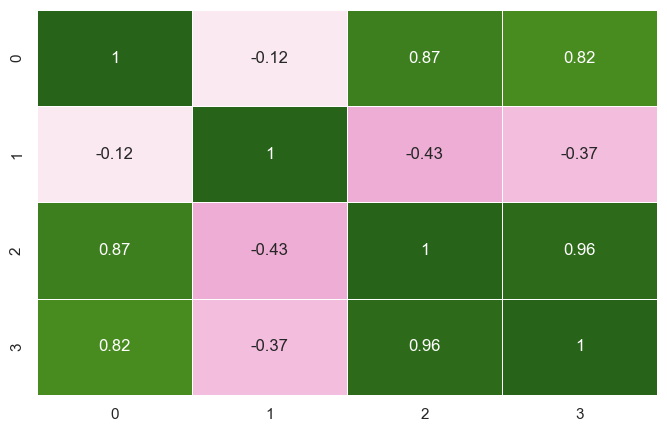

In [68]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(np.corrcoef(X_iris, rowvar=False),
annot=True,
linewidths=.5,
center=0,
cbar=False,
cmap="PiYG")

In [64]:
X_iris.shape

(150, 4)